# Monte Carlo Simulation for the Nifty Index

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('nifty5Y.csv', delimiter =',')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

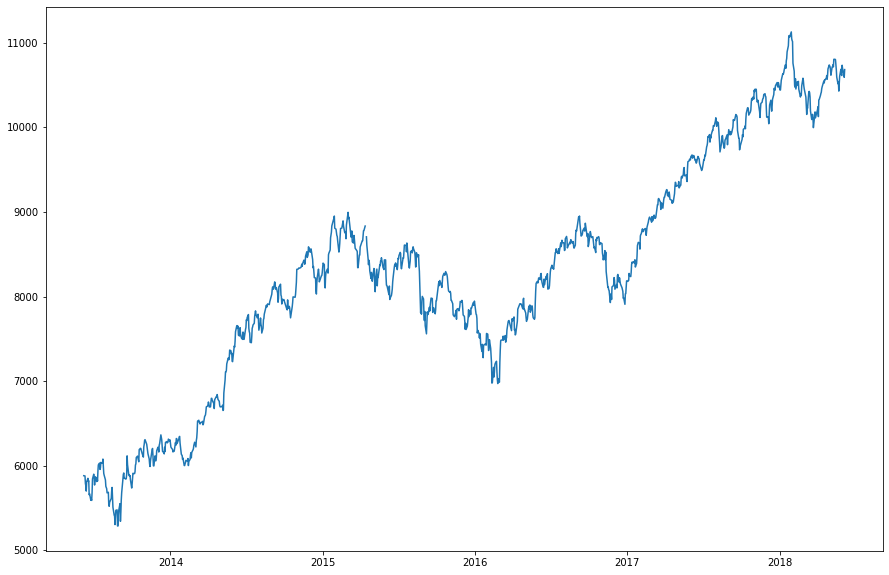

In [4]:
fig = plt.figure(figsize = (15,10))
plt.plot(df['Date'],df['Adj Close'])


In [5]:
df['Daily Returns'] = df['Adj Close'].pct_change()

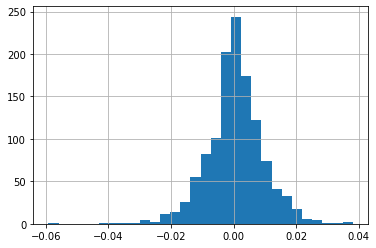

In [6]:
df['Daily Returns'].hist(bins=30)

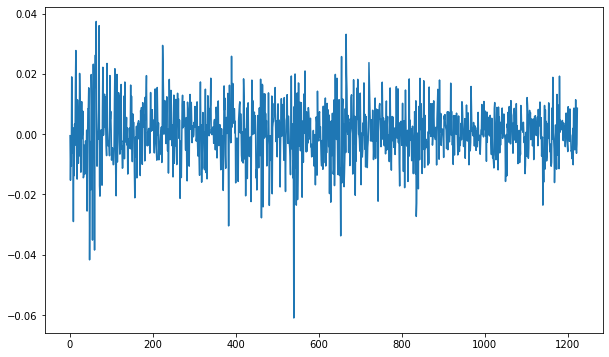

In [7]:
#Calculating log daily pc returns

log_returns = np.log(1 + df['Adj Close'].pct_change())
log_returns.plot(figsize = (10, 6))

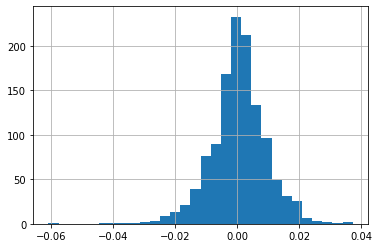

In [8]:
log_returns.hist(bins=30)

In [9]:
# calculating mean of log returns

u = log_returns.mean()

# calculating variance of log returns

var = log_returns.var()

print('Mean of the log_returns is : ', u)
print('Variance of the log_returns is : ', var)


Mean of the log_returns is :  0.00048821042776047764
Variance of the log_returns is :  8.315539645948476e-05


In [10]:
# Calculating the drift component
'''It is the best approximation of future rates of return of the stock.
The formula to use here will be “U”,
which equals the average log return, minus half its variance'''

drift = u - (0.5 * var)

# Calculating the standard deviation of log returns

stdev = log_returns.std()

'''Brownian motion comprises the sum of the drift and a variance adjusted by “E” to the power of “R”'''

#Converting them into arrays

#ype(drift)
stdev = np.array(stdev)
drift = np.array(drift)

In [11]:
from scipy.stats import norm 

'''The second component of the Brownian motion is a random variable, z,
a number corresponding to the distance between the mean and the events,
expressed as the number of standard deviation'''

# norm is A normal continuous random variable.
norm.ppf(0.95)

'''If an event has a 95% chance of occurring,
the distance between this event and the mean
will be approximately 1.65 standard deviations'''

#creating a random 10x2 matrix 
x = np.random.rand(10, 2)

Z = norm.ppf(x)


In [24]:
'''The newly created array used the probabilities generated by the “rand”
function and converted them into distances from the mean 0,
as measured by the number of standard deviations'''

Z


t_intervals = 200
iterations = 50

In [25]:
# The variable “daily returns” will show us what will equal “E” to the power of “R”.

# Browninan motion = drift + stdev*e^r

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [26]:
np.shape(daily_returns)

# we have 10 columns of 200 daily prices

(200, 50)

In [27]:
'''Each price must equal the product of the price observed
the previous day and the simulated daily return. Therefore,
once we obtain the price in day T, we can estimate the
expected stock price we will have in day T plus 1'''

# Getting the last price of our data
# this should be the first price of our simulations
S0 = df['Adj Close'].iloc[-1]
S0


10684.650391

In [28]:
# Making a price list ready to get values

price_list = np.zeros_like(daily_returns)

# Replace the first row with the first price
price_list[0] = S0

'''we can generate values for our price list. We must set up a
loop that begins in day 1 and ends at day 200'''

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

## Montecarlo simulation for the following 200 days

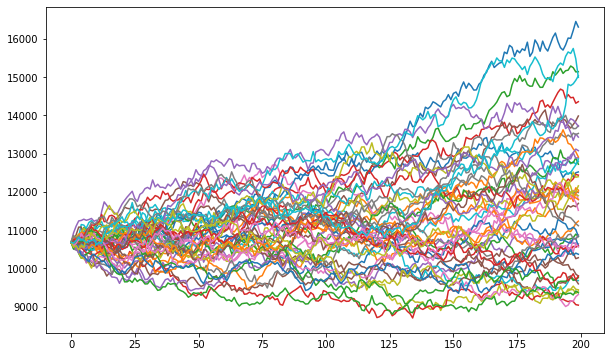

In [29]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

## Now let us simulate the last 200 days and compare with actual movement

In [38]:
prices = df['Adj Close']

real = prices[:-200]
simulation = prices[-200:]

log_returns_2 = np.log(1 + real.pct_change())

u_2 = log_returns.mean()

var_2 = log_returns.var()

drift_2 = u - (0.5 * var)

# Calculating the standard deviation of log returns

stdev_2 = log_returns.std()
stdev_2 = np.array(stdev)
drift_2 = np.array(drift)

t_intervals_2 = 200
iterations_2 = 35

daily_returns_2 = np.exp(drift_2 + stdev_2 * norm.ppf(np.random.rand(t_intervals_2, iterations_2)))

S0_2 = real.iloc[-1]

price_list_2 = np.zeros_like(daily_returns_2)

# Replace the first row with the first price
price_list_2[0] = S0_2


for t in range(1, t_intervals_2):
    price_list_2[t] = price_list_2[t - 1] * daily_returns_2[t]
    


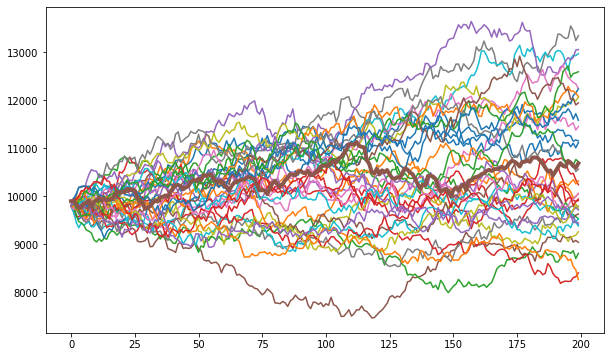

In [39]:
plt.figure(figsize=(10,6))
plt.plot(price_list_2)
plt.plot(simulation.values, linewidth = 4)

## plotting the mean of the simation values against price

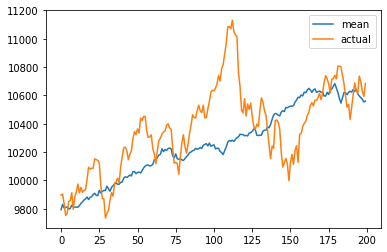

In [40]:
plt.plot(np.mean(price_list_2, axis=1), label = 'mean')
plt.plot(simulation.values, label = 'actual')
plt.legend(loc='best')